# Coursera Capstone Project

## The Battle of Neighborhoods - Final Report (Week 1 and Week 2)

### Content

1. Introduction Section

  1.1 Discussion of the business problem 

  1.2 Audience for this project


2. Data Section

  2.1 Data required to resolve the problem

  2.3 Data sources and how data are used to resolve the problem


3. Methodology section

  3.1 Steps of data analysis

  3.2 Data Science Methods, machine learing, mapping tools and exploratory data analysis.


4. Results section

  Discussion of the results


5. Discussion section

  Discussion on any observations and/or recommendations based on the results.


6. Conclusion section

  Report Conclusion

## 1. Introduction Section

### 1.1 Discussion of the business problem

Let's consider a scenario when someone who lived for a long time in Russia is moving to New York and looking for a place to live that has Russian restaurants. New York city is the largest city in the US and well-known to be one of the most multi-cultural and diverse cities in the world. Thus, it is not difficult to find any types of restaurants, shops of diverse culture. As a result, a person decided to find a place that has Russian restaurants. Moreover, it is important to have banks and grocery shops in the vicinity.

The following criteria should be taken into account in selecting the place of living:

1.	Russian restaurants with high average rating;
2.	Banks and grocery shops, which are common venues in the neighborhood.

The challenge is to analyse the neighborhoods that have the venues with a person's priority, if possible, to find the top venues. The data that are required to find a location is described below.



### 1.2 Audience for this project

This project might be interesting for people who should like to search a place with similar priorities, since the approach and methodology used are applicable for different scenarios.



## 2. Data Section

### 2.1 Data required to resolve the problem

The following data are required to find a location:

- New York City data that contain list of Boroughs, Neighborhoods along with their latitude and longitude. 

- Venues in each neighborhood of New York city. 



### 2.3 Data sources and how data are used to resolve the problem

The source of the list of New York city Borough, Neighborhood and Geodata information is located here: https://cocl.us/newyork_dataset. These data are used to have an information about New York city's neighborhood. 



In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


Foursquare API data contain information about the venues with the specified locations. Foursquare and geopy data are used to map top venues for all New York neighborhoods and clustered in groups.

The data will be used as follows: Use Foursquare and geopy data to map top venues for all New York neighborhoods and clustered in groups. A map will be created that shows the neighborhoods with the higest amount of top venues. From the map it will be easily visualized which neighborhood is the most suitable to the person and depicts his/her preferences.

In [3]:
# Use geopy library to get the latitude and longitude values of New York City
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


## 3. Methodology section


### Define a function to intract with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude. Below function will return us the venue id, venue name and category

In [4]:
# The code was removed by Watson Studio for sharing.

### Define a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.

In [5]:
def get_venue_details(venue_id):
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

### Collect Russian restaurants for each Neighborhood

In [6]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
russian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    russian_restaurants=venues[venues['Category']=='Russian Restaurant']   
    print('(',count,'/',len(neighborhoods),')','Russian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(russian_restaurants)))
    for restaurant_detail in russian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        russian_rest_ny = russian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1


( 1 / 306 ) Russian Restaurants in Wakefield, Bronx:0
( 2 / 306 ) Russian Restaurants in Co-op City, Bronx:0
( 3 / 306 ) Russian Restaurants in Eastchester, Bronx:0
( 4 / 306 ) Russian Restaurants in Fieldston, Bronx:0
( 5 / 306 ) Russian Restaurants in Riverdale, Bronx:0
( 6 / 306 ) Russian Restaurants in Kingsbridge, Bronx:0
( 7 / 306 ) Russian Restaurants in Marble Hill, Manhattan:0
( 8 / 306 ) Russian Restaurants in Woodlawn, Bronx:0
( 9 / 306 ) Russian Restaurants in Norwood, Bronx:0
( 10 / 306 ) Russian Restaurants in Williamsbridge, Bronx:0
( 11 / 306 ) Russian Restaurants in Baychester, Bronx:0
( 12 / 306 ) Russian Restaurants in Pelham Parkway, Bronx:0
( 13 / 306 ) Russian Restaurants in City Island, Bronx:0
( 14 / 306 ) Russian Restaurants in Bedford Park, Bronx:0
( 15 / 306 ) Russian Restaurants in University Heights, Bronx:0
( 16 / 306 ) Russian Restaurants in Morris Heights, Bronx:0
( 17 / 306 ) Russian Restaurants in Fordham, Bronx:0
( 18 / 306 ) Russian Restaurants in Ea

### Collected data can be analyzed 

In [7]:
russian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Brooklyn,Bensonhurst,51f092a2498e9f9edd14b597,Verrazano Grill
1,Brooklyn,Gravesend,4a2937fcf964a52069951fe3,Stolovaya
2,Brooklyn,Brighton Beach,4ac69109f964a52017b520e3,Skovorodka
3,Brooklyn,Brighton Beach,4245f780f964a52070201fe3,Tatiana Restaurant
4,Brooklyn,Brighton Beach,4c1ea63763750f474c19ba67,Volna Café


In [8]:
russian_rest_ny.shape

(23, 4)

There are 23 Russian restaurants in New York

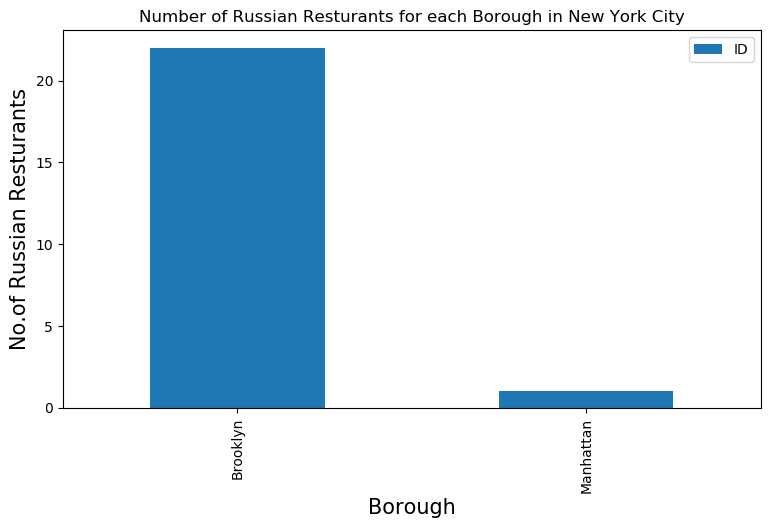

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Russian Resturants for each Borough in New York City')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Russian Resturants', fontsize=15)
russian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
plt.legend()
plt.show()

There are only two borough where the Russian restaurants are located. The highest amount of Russian restaurants is located in Brooklyn

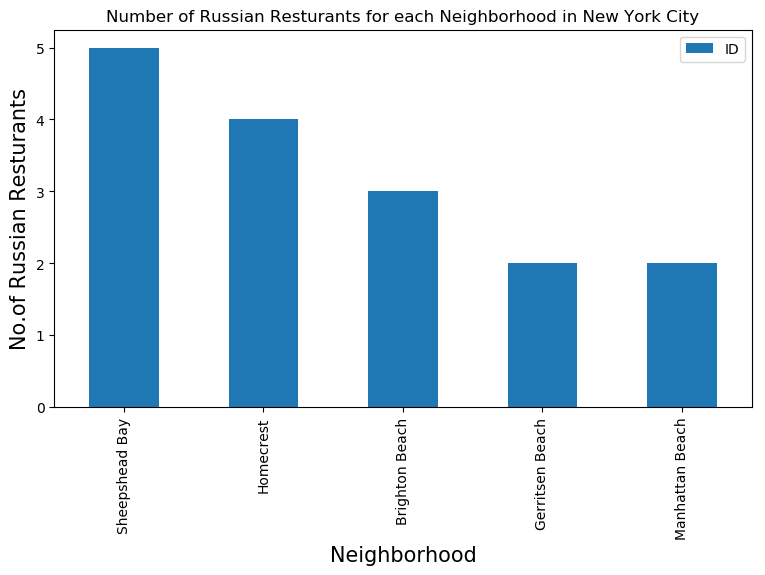

In [10]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Russian Resturants for each Neighborhood in New York City')
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No.of Russian Resturants', fontsize=15)
russian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
plt.legend()
plt.show()

Two neighborhoods share the highest amount of Russian restaurants - Homecrest and Sheelshead Bay

Further the ranking of the restaurants is analyzed

In [11]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
russian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in russian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(russian_rest_ny),')','processed')
    russian_rest_stats_ny = russian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 51f092a2498e9f9edd14b597
( 1 / 23 ) processed
                         ID       Name  Likes  Rating  Tips
0  4a2937fcf964a52069951fe3  Stolovaya     41     7.9    27
( 2 / 23 ) processed
                         ID        Name  Likes  Rating  Tips
0  4ac69109f964a52017b520e3  Skovorodka     92     7.9    48
( 3 / 23 ) processed
                         ID                Name  Likes  Rating  Tips
0  4245f780f964a52070201fe3  Tatiana Restaurant    157     7.1    67
( 4 / 23 ) processed
                         ID        Name  Likes  Rating  Tips
0  4c1ea63763750f474c19ba67  Volna Café     32     6.3    20
( 5 / 23 ) processed
                         ID               Name  Likes  Rating  Tips
0  5a08f7e2d48ec1369706f57d  Bellarussian Xata     23     9.1     6
( 6 / 23 ) processed
                         ID           Name  Likes  Rating  Tips
0  55d6885e498e41b9e7b8b5e8  Cafe Dushanbe     10     

In [12]:
russian_rest_stats_ny.head(10)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Bensonhurst,0,0,0,0,0
1,Brooklyn,Gravesend,4a2937fcf964a52069951fe3,Stolovaya,41,7.9,27
2,Brooklyn,Brighton Beach,4ac69109f964a52017b520e3,Skovorodka,92,7.9,48
3,Brooklyn,Brighton Beach,4245f780f964a52070201fe3,Tatiana Restaurant,157,7.1,67
4,Brooklyn,Brighton Beach,4c1ea63763750f474c19ba67,Volna Café,32,6.3,20
5,Brooklyn,Sheepshead Bay,5a08f7e2d48ec1369706f57d,Bellarussian Xata,23,9.1,6
6,Brooklyn,Sheepshead Bay,55d6885e498e41b9e7b8b5e8,Cafe Dushanbe,10,7.3,3
7,Brooklyn,Sheepshead Bay,5324ee02498e9a825bb4f689,La Vue Restaurant,23,7.2,3
8,Brooklyn,Sheepshead Bay,4b53cec1f964a520f9ab27e3,Vanka Vstanka,5,6.1,4
9,Brooklyn,Sheepshead Bay,4b2ecbf5f964a520cee624e3,Passage,8,6,5


In [13]:
# russian_rest_stats_ny.info()
russian_rest_stats_ny['Likes']=russian_rest_stats_ny['Likes'].astype('float64')
russian_rest_stats_ny['Tips']=russian_rest_stats_ny['Tips'].astype('float64')
russian_rest_stats_ny['Rating']=russian_rest_stats_ny['Rating'].astype('float64')
russian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
Borough         23 non-null object
Neighborhood    23 non-null object
ID              23 non-null object
Name            23 non-null object
Likes           23 non-null float64
Rating          23 non-null float64
Tips            23 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.3+ KB


In [14]:
# Resturant with maximum Likes
russian_rest_stats_ny.iloc[russian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                    Gramercy
ID              4a777018f964a5207be41fe3
Name                          Mari Vanna
Likes                                536
Rating                               8.7
Tips                                 192
Name: 18, dtype: object

In [15]:
# Resturant with maximum Rating
russian_rest_stats_ny.iloc[russian_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood              Sheepshead Bay
ID              5a08f7e2d48ec1369706f57d
Name                   Bellarussian Xata
Likes                                 23
Rating                               9.1
Tips                                   6
Name: 5, dtype: object

In [16]:
# Resturant with maximum Tips
russian_rest_stats_ny.iloc[russian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                    Gramercy
ID              4a777018f964a5207be41fe3
Name                          Mari Vanna
Likes                                536
Rating                               8.7
Tips                                 192
Name: 18, dtype: object

Select the neighborhoods with maximum average ratings

In [17]:
ny_neighborhood_stats=russian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
3,Gramercy,8.70
4,Gravesend,7.90
9,Sheepshead Bay,7.14
1,Brighton Beach,7.10
5,Homecrest,6.85
7,Manhattan Terrace,6.70
8,Ocean Parkway,6.70
2,Gerritsen Beach,6.65
6,Manhattan Beach,6.65
0,Bensonhurst,0.00


In [18]:
ny_borough_stats=russian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Manhattan,8.700000
0,Brooklyn,6.622727


In [19]:
# Only restaurants with average rating above 6 will be visualized on the map
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=6.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
1,Brighton Beach,7.10
2,Gerritsen Beach,6.65
3,Gramercy,8.70
4,Gravesend,7.90
5,Homecrest,6.85
6,Manhattan Beach,6.65
7,Manhattan Terrace,6.70
8,Ocean Parkway,6.70
9,Sheepshead Bay,7.14


In [20]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats, neighborhoods, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Brighton Beach,40.576825,-73.965094,7.10
1,Brooklyn,Gerritsen Beach,40.590848,-73.930102,6.65
2,Manhattan,Gramercy,40.737210,-73.981376,8.70
3,Brooklyn,Gravesend,40.595260,-73.973471,7.90
4,Brooklyn,Homecrest,40.598525,-73.959185,6.85
5,Brooklyn,Manhattan Beach,40.577914,-73.943537,6.65
6,Brooklyn,Manhattan Terrace,40.614433,-73.957438,6.70
7,Brooklyn,Ocean Parkway,40.613060,-73.968367,6.70
8,Brooklyn,Sheepshead Bay,40.586890,-73.943186,7.14


The dataframe containing the data about borough, neighborhood, geodata and average rating of the restaurants is created.
The next step is to create a map

In [22]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )


In [23]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'


# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(map_newyork)        
# add incidents to map
map_newyork.add_child(incidents)

The map above shows the locations of neighborhoods with maximum average ratings of Russian restaurants. There is only one neighborhood and limited number of Russian restaurants in Manhattan, even if it has the highest maximum rate. It is better to have more options of neighborhoods and restaurants to decide. Thus, Brooklyn is further chosen for the analysis. One of the criteria of the person was to have the banks and grocery shops. So, the ratings and locations of these venues in Brooklyn Borough is analysed.

In [24]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head(10) 

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471
5,Brooklyn,Brighton Beach,40.576825,-73.965094
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438
8,Brooklyn,Flatbush,40.636326,-73.958401
9,Brooklyn,Crown Heights,40.670829,-73.943291


In [25]:
address2 = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address2)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )


Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [28]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2849, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


In [29]:
brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,51,51,51,51,51,51
Bay Ridge,89,89,89,89,89,89
Bedford Stuyvesant,27,27,27,27,27,27
Bensonhurst,35,35,35,35,35,35
Bergen Beach,6,6,6,6,6,6
Boerum Hill,88,88,88,88,88,88
Borough Park,23,23,23,23,23,23
Brighton Beach,44,44,44,44,44,44
Broadway Junction,13,13,13,13,13,13


In [30]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,

In [40]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped


,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,

In [41]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Bath Beach----
                  venue  freq
0    Chinese Restaurant  0.06
1              Pharmacy  0.06
2       Bubble Tea Shop  0.04
3            Kids Store  0.04
4  Fast Food Restaurant  0.04


----Bay Ridge----
                 venue  freq
0                  Spa  0.07
1   Italian Restaurant  0.07
2          Pizza Place  0.04
3     Greek Restaurant  0.03
4  American Restaurant  0.03


----Bedford Stuyvesant----
         venue  freq
0         Café  0.07
1  Pizza Place  0.07
2          Bar  0.07
3  Coffee Shop  0.07
4     Wine Bar  0.04


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.11
1    Sushi Restaurant  0.06
2  Italian Restaurant  0.06
3       Grocery Store  0.06
4      Ice Cream Shop  0.06


----Bergen Beach----
                venue  freq
0     Harbor / Marina  0.33
1  Athletics & Sports  0.17
2      Baseball Field  0.17
3          Playground  0.17
4          Donut Shop  0.17


----Boerum Hill----
                    venue  freq
0             Cof

In [42]:
#Let's put that into a pandas dataframe
#First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Chinese Restaurant,Pharmacy,Pizza Place,Kids Store,Italian Restaurant,Bubble Tea Shop,Fast Food Restaurant,Sushi Restaurant,Donut Shop,Burger Joint
1,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Greek Restaurant,American Restaurant,Bar,Ice Cream Shop,Sandwich Place,Chinese Restaurant
2,Bedford Stuyvesant,Coffee Shop,Café,Pizza Place,Bar,Juice Bar,New American Restaurant,Cocktail Bar,Fruit & Vegetable Store,Gourmet Shop,Bus Stop
3,Bensonhurst,Chinese Restaurant,Ice Cream Shop,Italian Restaurant,Donut Shop,Grocery Store,Sushi Restaurant,Spa,Food Truck,Pet Store,Smoke Shop
4,Bergen Beach,Harbor / Marina,Donut Shop,Baseball Field,Playground,Athletics & Sports,Women's Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


In [43]:
# Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 0, 0, 0, 0, 0, 4, 0, 4, 0], dtype=int32)

In [44]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data

brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,0,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Greek Restaurant,American Restaurant,Bar,Ice Cream Shop,Sandwich Place,Chinese Restaurant
1,Brooklyn,Bensonhurst,40.611009,-73.995180,0,Chinese Restaurant,Ice Cream Shop,Italian Restaurant,Donut Shop,Grocery Store,Sushi Restaurant,Spa,Food Truck,Pet Store,Smoke Shop
2,Brooklyn,Sunset Park,40.645103,-74.010316,4,Bakery,Bank,Pizza Place,Mexican Restaurant,Latin American Restaurant,Pharmacy,Mobile Phone Shop,Gym,Women's Store,Italian Restaurant
3,Brooklyn,Greenpoint,40.730201,-73.954241,0,Bar,Coffee Shop,Cocktail Bar,Pizza Place,Yoga Studio,French Restaurant,Café,Boutique,Mexican Restaurant,Record Shop
4,Brooklyn,Gravesend,40.595260,-73.973471,0,Chinese Restaurant,Italian Restaurant,Pizza Place,Bakery,Bus Station,Lounge,Gym,Cupcake Shop,Pharmacy,Donut Shop


In [45]:
#Finally, let's visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [46]:
#Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.
#Cluster 1
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Greek Restaurant,American Restaurant,Bar,Ice Cream Shop,Sandwich Place,Chinese Restaurant
1,Bensonhurst,Chinese Restaurant,Ice Cream Shop,Italian Restaurant,Donut Shop,Grocery Store,Sushi Restaurant,Spa,Food Truck,Pet Store,Smoke Shop
3,Greenpoint,Bar,Coffee Shop,Cocktail Bar,Pizza Place,Yoga Studio,French Restaurant,Café,Boutique,Mexican Restaurant,Record Shop
4,Gravesend,Chinese Restaurant,Italian Restaurant,Pizza Place,Bakery,Bus Station,Lounge,Gym,Cupcake Shop,Pharmacy,Donut Shop
5,Brighton Beach,Russian Restaurant,Eastern European Restaurant,Beach,Restaurant,Sushi Restaurant,Gourmet Shop,Bank,Fast Food Restaurant,Mobile Phone Shop,Supplement Shop
6,Sheepshead Bay,Turkish Restaurant,Dessert Shop,Sandwich Place,Yoga Studio,Pizza Place,Russian Restaurant,Restaurant,Creperie,Playground,Department Store
7,Manhattan Terrace,Pizza Place,Donut Shop,Spa,Coffee Shop,Ice Cream Shop,Steakhouse,Liquor Store,Eastern European Restaurant,Grocery Store,Bank
12,Windsor Terrace,Diner,Café,Park,Italian Restaurant,Chinese Restaurant,Sushi Restaurant,Beer Store,Coffee Shop,Bookstore,Grocery Store
13,Prospect Heights,Bar,Mexican Restaurant,Ice Cream Shop,Gourmet Shop,Thai Restaurant,Cocktail Bar,Bakery,Wine Shop,Beer Bar,Café
15,Williamsburg,Bagel Shop,Bar,Coffee Shop,Japanese Restaurant,Café,Taco Place,Korean Restaurant,Clothing Store,Latin American Restaurant,Yoga Studio


In [47]:
#Cluster 2
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Canarsie,Gym,Asian Restaurant,Event Service,Bus Line,Caribbean Restaurant,Home Service,Chinese Restaurant,Farm,Farmers Market,Fast Food Restaurant
59,Paerdegat Basin,Asian Restaurant,Moving Target,Bus Line,Food,Home Service,Chinese Restaurant,Women's Store,Falafel Restaurant,Farm,Farmers Market


In [48]:
#Cluster 3
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Mill Island,Pool,Lake,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Event Service


In [49]:
#Cluster 4
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,Midwood,Pizza Place,Italian Restaurant,Pharmacy,Convenience Store,Candy Store,Bank,Bakery,BBQ Joint,Ice Cream Shop,Video Game Store


In [50]:
#Cluster 5
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Sunset Park,Bakery,Bank,Pizza Place,Mexican Restaurant,Latin American Restaurant,Pharmacy,Mobile Phone Shop,Gym,Women's Store,Italian Restaurant
8,Flatbush,Mexican Restaurant,Coffee Shop,Caribbean Restaurant,Juice Bar,Bank,Plaza,Diner,Pharmacy,Donut Shop,Chinese Restaurant
9,Crown Heights,Pizza Place,Museum,Bagel Shop,Café,Burger Joint,Supermarket,Candy Store,Moving Target,Bakery,Coffee Shop
10,East Flatbush,Department Store,Pharmacy,Food & Drink Shop,Bakery,Fast Food Restaurant,Park,Supermarket,Hardware Store,Moving Target,Deli / Bodega
11,Kensington,Grocery Store,Thai Restaurant,Pharmacy,Ice Cream Shop,Sandwich Place,Pizza Place,Department Store,Bus Station,Café,Restaurant
14,Brownsville,Restaurant,Pizza Place,Performing Arts Venue,Chinese Restaurant,Caribbean Restaurant,Burger Joint,Farmers Market,Fried Chicken Joint,Moving Target,Park
25,Cypress Hills,Pizza Place,Fried Chicken Joint,Latin American Restaurant,Donut Shop,Chinese Restaurant,Fast Food Restaurant,Ice Cream Shop,Intersection,Baseball Field,Deli / Bodega
26,East New York,Deli / Bodega,Fast Food Restaurant,Liquor Store,Chinese Restaurant,Pharmacy,Bus Station,Metro Station,Gym,Event Service,Pizza Place
27,Starrett City,Bus Station,Women's Store,Supermarket,Pharmacy,Donut Shop,Caribbean Restaurant,Bus Stop,Shopping Mall,Pizza Place,American Restaurant
29,Flatlands,Pharmacy,Fried Chicken Joint,Fast Food Restaurant,Caribbean Restaurant,Dessert Shop,Park,Lounge,Nightclub,Electronics Store,Paper / Office Supplies Store


## 4. Results section

Only 23 Russian restaurants were found in 306 neighborhoods, and 9 restaurants that have maximum average rating above 6. Most of them are located in Brooklyn borough. Thus, it was decided to select this borough for further analysis as the high amount of restaurants give more options to select which is more preferable. All venues in Brooklyn were clustered into 5 clusters based on their most comon venues. Homecrest and Manhattan Terrace are the neigborhoods which have all the requirements that have to be complied. They both have russian restaurants as well as banks and grocery stores. They fall under two different clusters (1 & 5), and have quite similar average ratings of Russian restaurants. Thus, these two neighborhoods both can be considered for living.


## 5. Discussion section

While doing the analysis some interesting points were found:
- 23 Russian restaurants were provided by Foursquare. It's remarkable that there are many Russian restaurants in New York city, which can show how much the city is diverse.
- The maximum average ratings of Russian restaurants are low compared to other restaurants. 
- While analysis of Brooklyn's venues, it was observed that there are lots of other popular restraurants, shops and bars which makes this Borough even more attractive for living.


## 6. Conclusion section

Although the analysed data are not enough for selecting the place to live, we have come up with a way to solve the problem of finding a place with minimum criteria based on the venues. In order to applt this in real life, it is important to consider rent price, location, neighborhood and lots of other factors which are not discussed in this report. In general, by applying this simple analysis we could decrease the search locations to two neighborhoods as a starting point.

